# Pandas

In [3]:
import pandas as pd
import yfinance as yf
import numpy as np
from icecream import ic


## Desafio
> - Retorno acumulado ano a ano contra o Ibovespa
> - Estatísticas descritivas de volatilidade, média de retornos, maior retorno e menor retorno por ano
> - Maximo Drawdown por ano
> - Grafico de correlação de 252 dias contra o Ibovespa
> - Volume financeiro médio anual negociado pela empresa

[*********************100%%**********************]  2 of 2 completed
Retorno ano a ano
            retorno_YTD_MGLU3.SA       ^BVSP
Date                                        
2011-12-29            -42.006026  100.389146
2012-12-28             27.524732  100.887182
2013-12-30            -37.860144  100.468137
2014-12-30              4.656912   98.839783
2015-12-30            -70.461182   99.303615
2016-12-29            501.531558  100.744371
2017-12-29            511.031621  100.000000
2018-12-28            126.339194  102.839925
2019-12-30            112.326358   99.510872
2020-12-30            114.495571   99.858548
2021-12-30            -71.041141  100.686793
2022-12-29            -62.049860   99.813130
2023-10-16            -34.306571  100.637471

Estatísticas descritivas: 
ano        
2011  min      -8.550078
      max      11.022211
      media    -0.279598
      vol       0.473751
2012  min     -10.087864
      max       9.313576
      media     0.132329
      vol       0.40694

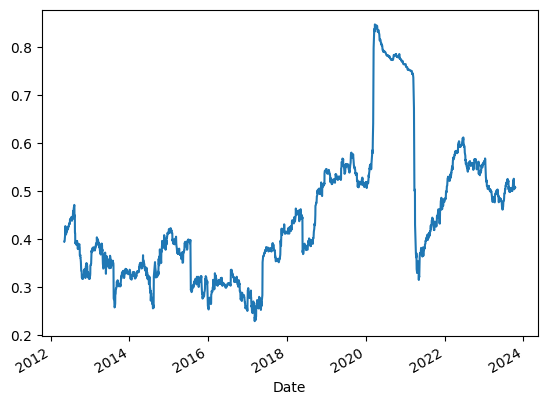

In [9]:
acao = input('Escolha uma ação para ser analisada: ').upper()
acao = acao + '.SA'
ativos = [acao, '^BVSP']

dados_completos = yf.download(ativos).dropna()
cotacoes_ajustadas = dados_completos['Adj Close']

retornos = cotacoes_ajustadas.pct_change().dropna()
retornos['ano'] = retornos.index.year

#retorno acum por ano

retornos[f'{acao}'] = retornos[f'{acao}'] + 1
retornos['^BVSP'] = retornos['^BVSP'] + 1

retornos[f'retorno_YTD_{acao}'] = retornos.groupby('ano')[f'{acao}'].cumprod() - 1
retornos[f'retorno_YTD_^BVSP'] = retornos.groupby('ano')[f'^BVSP'].cumprod() - 1

retorno_por_ano = retornos.groupby('ano').tail(1)[[f'retorno_YTD_{acao}', '^BVSP']]

print('Retorno ano a ano')
print(retorno_por_ano * 100)
print()

# Estat descritivas da empresa

retornos = cotacoes_ajustadas[f'{acao}'].pct_change().dropna()
retornos = retornos.to_frame()

retornos['ano'] = retornos.index.year

def estatisticas(agrupamento):
    return {
        'min': agrupamento.min() * 100,
        'max': agrupamento.max() * 100,
        'media': agrupamento.mean() * 100,
        'vol': agrupamento.std() * np.sqrt(252)
        }

descritivas = retornos.groupby('ano')[f'{acao}'].apply(estatisticas)

print('Estatísticas descritivas: ')
print(descritivas)
print()

#maxDrawDown

cotacoes_empresa = cotacoes_ajustadas[f'{acao}']
cotacoes_empresa = cotacoes_empresa.to_frame()

cotacoes_empresa['ano'] = cotacoes_empresa.index.year

cotacoes_empresa['maxima_do_ano'] = cotacoes_empresa.groupby('ano')[f'{acao}'].cummax()
cotacoes_empresa['quedas'] = cotacoes_empresa[f'{acao}'] / cotacoes_empresa['maxima_do_ano'] -1

print('Max DD: ')
print(cotacoes_empresa.groupby('ano')['quedas'].min())
print()

#grafico de correlacao contra ibov

retornos = cotacoes_ajustadas.pct_change().dropna()
retornos[f'{acao}'].rolling(252).corr(retornos['^BVSP']).dropna().plot()

#volume medio anual

volume_acoes = dados_completos['Volume'][f'{acao}']
cotacao = dados_completos['Close'][f'{acao}']

volume_financeiro = volume_acoes * cotacao
volume_financeiro = volume_financeiro.to_frame()
volume_financeiro['ano'] = volume_financeiro.index.year


volume_medio = volume_financeiro.groupby('ano').mean()

volume_medio = volume_medio.astype(int)
print('Volume médio anual: ')
print(volume_medio)


